#Steps
1. having the data
2. Split the data train and test
3. Module building(class LinearRegressionModel)
4. Create an instance
5. make a prediction with the mode(y_preds = model_0(X_test))
6. Create a loss and optimizer fonctions
7. Training Loop
8. Save

#import libraries

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Create a simple data

In [ ]:
#create a known parameters
weights=0.7
bias=0.3
#create data
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
Y=weights*X+bias #Linear regression formula

X[:5],Y[:5] #x is features, y is a labels

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

#Split the data

In [ ]:
#split the data
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],Y[:train_split]
X_test,y_test=X[train_split:],Y[train_split:]
len(X_train), len(y_train),len(X_test),len (y_test)

(40, 40, 10, 10)

#Visualise the training and test data

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4, label="training data")
  plt.scatter(test_data,test_labels,c="g",s=4, label="testing data")
  if predictions is not None:
   plt.scatter(test_data,predictions, c="r",s=4, label="Predictions")
  plt.legend(prop={"size":14});


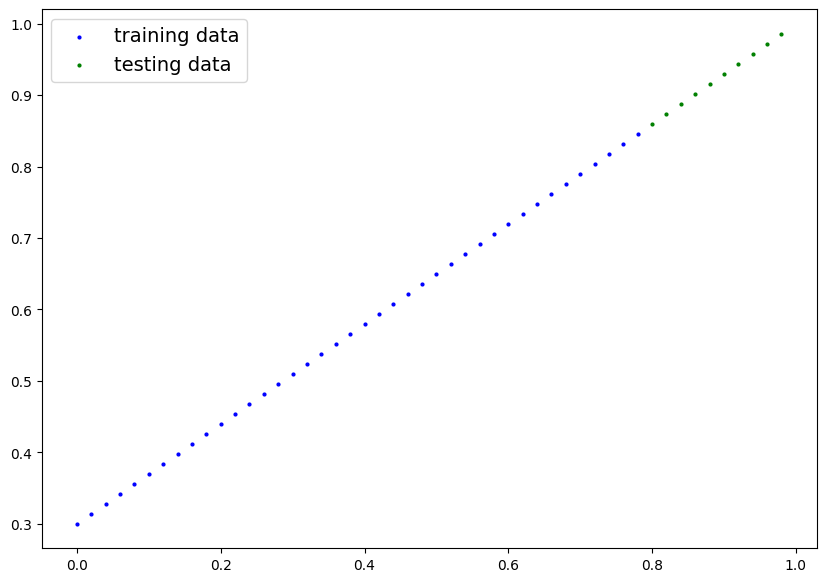

In [ ]:
plot_predictions();

#Module Building

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.rand(1,
                                        dtype=torch.float),
                                        requires_grad=True)

    self.bias=nn.Parameter(torch.rand(1,dtype=torch.float),requires_grad=True)

#self.linear_layer=nn.linear(in_features=1,out_features=1)
#def forward(self,x:torch.tensor)->torch.tensor:
#return self.linea_layer(x)
  def forward(self, x:torch.tensor)->  torch.tensor:
      return self.weights * x +self.bias

#Create an instance

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
#list(model_0.parameters())
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

#Make a prediction

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

#check the predicted values and visualise

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


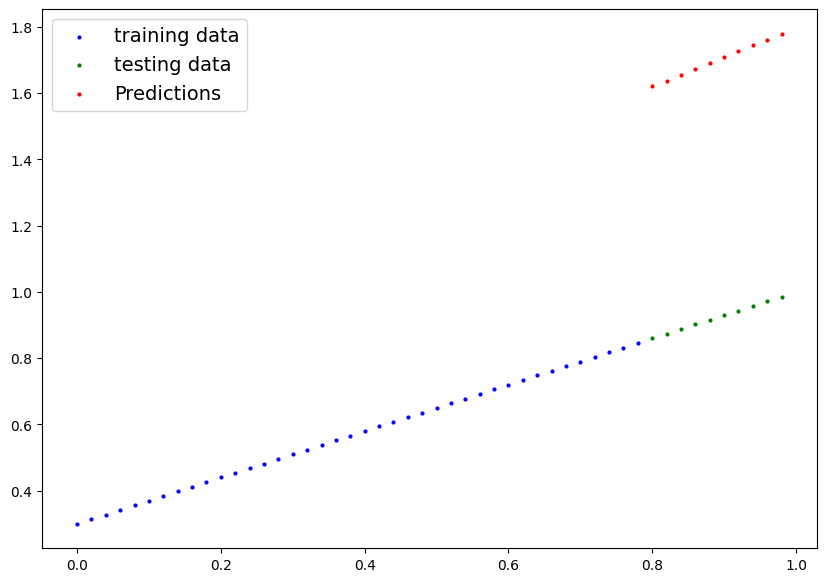

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

tensor([[-0.7608],
        [-0.7645],
        [-0.7681],
        [-0.7718],
        [-0.7754],
        [-0.7790],
        [-0.7827],
        [-0.7863],
        [-0.7900],
        [-0.7936]])

#Create a loss and optimizer fonctions


In [ ]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

#Training Loop

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.6860889196395874 | MAE Test Loss: 0.7637526988983154 
Epoch: 10 | MAE Train Loss: 0.5708791017532349 | MAE Test Loss: 0.6290428042411804 
Epoch: 20 | MAE Train Loss: 0.45566922426223755 | MAE Test Loss: 0.4943329691886902 
Epoch: 30 | MAE Train Loss: 0.34045934677124023 | MAE Test Loss: 0.35962313413619995 
Epoch: 40 | MAE Train Loss: 0.2252494841814041 | MAE Test Loss: 0.2249133139848709 
Epoch: 50 | MAE Train Loss: 0.1100396141409874 | MAE Test Loss: 0.09020347893238068 
Epoch: 60 | MAE Train Loss: 0.009724985808134079 | MAE Test Loss: 0.020998019725084305 
Epoch: 70 | MAE Train Loss: 0.006216754671186209 | MAE Test Loss: 0.014099234715104103 
Epoch: 80 | MAE Train Loss: 0.002788322512060404 | MAE Test Loss: 0.005826681852340698 
Epoch: 90 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 


#Visualise the result of the training and test

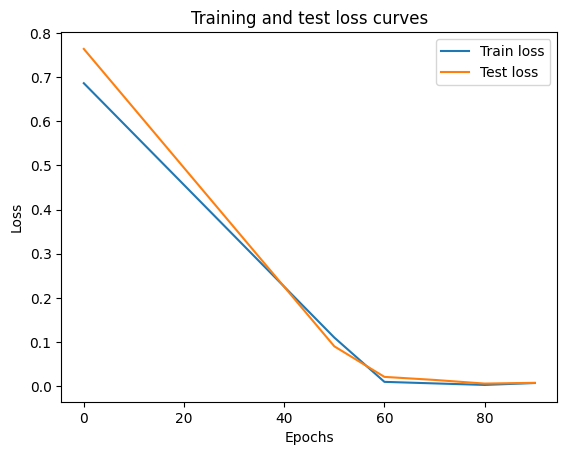

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

#Visualise the Predicted VS actual

In [ ]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

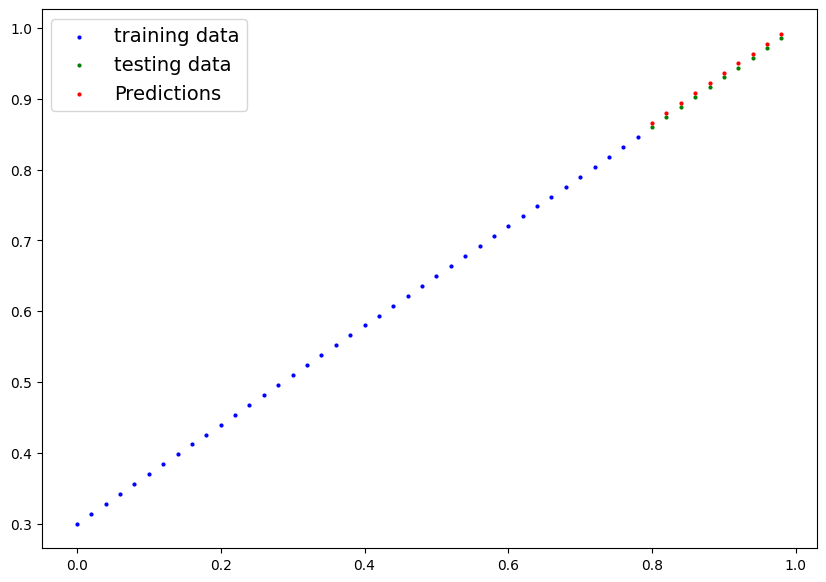

In [ ]:
plot_predictions(predictions=y_preds)

#Save the Prediction

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth
